In [1]:
from itertools import groupby

import  pandas as pd

df = pd.read_csv('mushroom_classification.csv')

df.head()

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [2]:
df.shape

(54035, 9)

In [3]:
features_to_analyze = ['cap_diameter', 'stem_height', 'stem_width']

In [4]:
grouped = df.groupby('class')[features_to_analyze].mean()
grouped

,cap_diameter,stem_height,stem_width
class,,,
0,633.064696,0.627374,1208.915189
1,513.236293,0.867251,921.516563


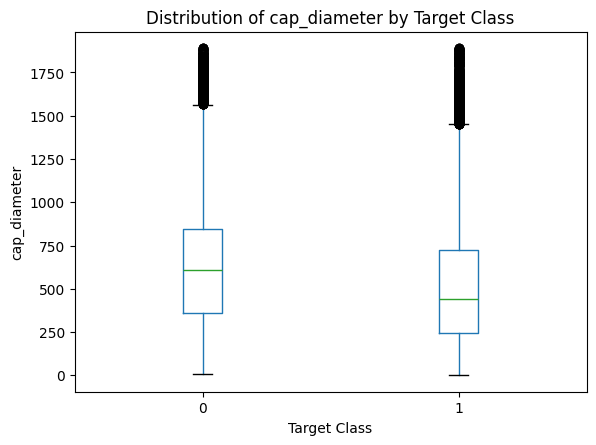

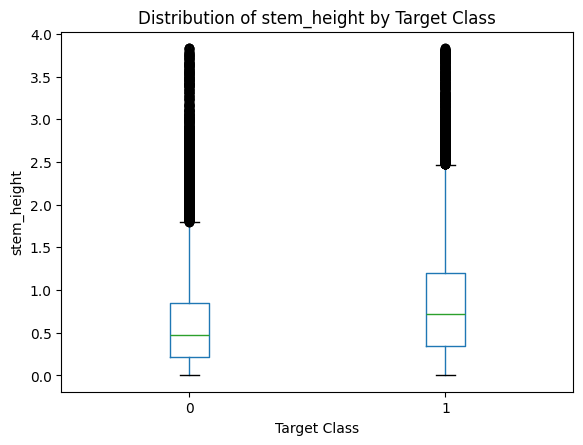

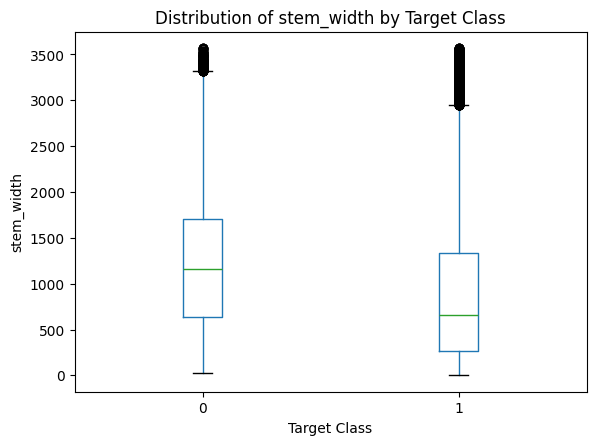

In [5]:
from matplotlib import pyplot as plt

for feature in features_to_analyze:
    df.boxplot(column=feature, by='class', grid=False)
    plt.title(f'Distribution of {feature} by Target Class')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()

In [6]:
X = df[["cap_diameter", "cap_shape", "gill_attachment", "gill_color", "stem_height", "stem_width", "stem_color", "season"]]
y = df["class"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.61      0.54      0.57      6087
           1       0.65      0.71      0.68      7422

    accuracy                           0.63     13509
   macro avg       0.63      0.63      0.63     13509
weighted avg       0.63      0.63      0.63     13509



In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6087
           1       0.98      0.98      0.98      7422

    accuracy                           0.98     13509
   macro avg       0.98      0.97      0.98     13509
weighted avg       0.98      0.98      0.98     13509



In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6087
           1       0.90      0.89      0.89      7422

    accuracy                           0.88     13509
   macro avg       0.88      0.88      0.88     13509
weighted avg       0.88      0.88      0.88     13509



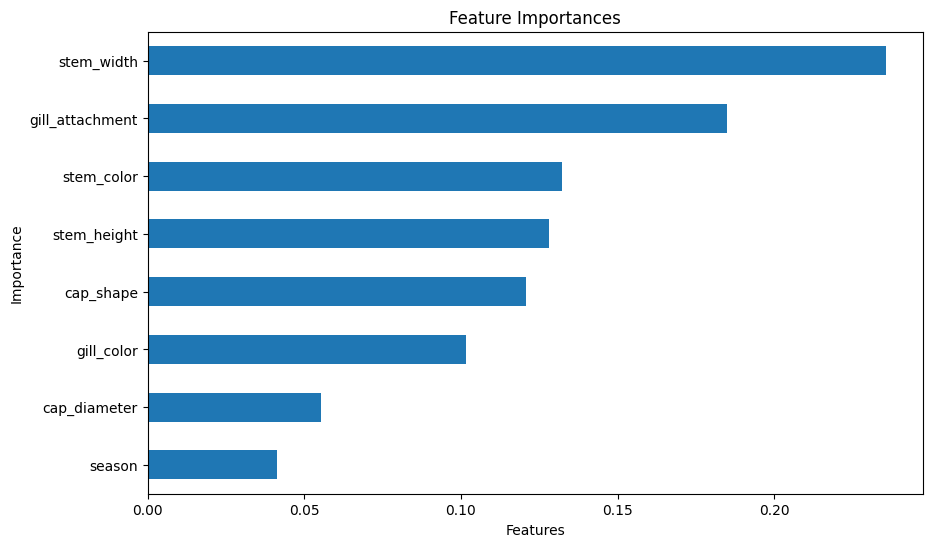

In [12]:
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [13]:
gb_params = {
    'learning_rate': 0.05,
    'n_estimators': 150,
    'max_depth': 4,
    'min_samples_split': 3,
    'min_samples_leaf': 2
}

gb_model_custom = GradientBoostingClassifier(**gb_params)
gb_model_custom.fit(X_train, y_train)

y_pred_gb_custom = gb_model_custom.predict(X_test)

print(classification_report(y_test, y_pred_gb_custom))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6087
           1       0.93      0.90      0.91      7422

    accuracy                           0.90     13509
   macro avg       0.90      0.90      0.90     13509
weighted avg       0.90      0.90      0.90     13509

